# Database 2 - Série histórica (25 anos) do clima de BH

# Importação de Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import os
# Para plotar figuras com condições aceitaveis
%matplotlib inline
#mpl.rc('axes', labelsize=14)
#mpl.rc('xtick', labelsize=12)
#mpl.rc('ytick', labelsize=12)

# Onde salvar as figuras
PROJECT_ROOT_DIR = r'C:\Users\André Tavares\Desktop'
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Carregamento e limpeza de arquivo

In [2]:
arquivo_weather = pd.read_csv('C:/Users/André Tavares/Desktop/TCC/Open Weather/9c548082fda1aff5f406fda555495590.csv')

In [3]:
arquivo_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219967 entries, 0 to 219966
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   219967 non-null  int64  
 1   dt_iso               219967 non-null  object 
 2   timezone             219967 non-null  int64  
 3   city_name            219967 non-null  object 
 4   lat                  219967 non-null  float64
 5   lon                  219967 non-null  float64
 6   temp                 219967 non-null  float64
 7   feels_like           219967 non-null  float64
 8   temp_min             219967 non-null  float64
 9   temp_max             219967 non-null  float64
 10  pressure             219967 non-null  int64  
 11  sea_level            0 non-null       float64
 12  grnd_level           0 non-null       float64
 13  humidity             219967 non-null  int64  
 14  wind_speed           219967 non-null  float64
 15  wind_deg         

Preencher o atributo rain_1h com ZEROS, devido a não existencia de chua em alguns momentos ou horas do ano. retirar rain_3h, grnd_level e sea_level pois não tem nenhum valor numérico.

Os três atributos retirados daqui possuem seus valores NaN na integralidade e foram portanto removidos da análise

### Data Fill -> arquivo_weather['rain_1h']

In [4]:
arquivo_weather['rain_1h'].fillna(0, inplace=True)

A decisão de se preencher os valores NaN da coluna 'rain_1h' é justificada pela ausencia de chuvas nos períodos de horas em que as medições ocorreram.

# String to Date time

Houve uma substituição prévia no software Excel dos valores dos valores +0000 UTC por caracteres em branco a fim de adequar o texto de string para um formato compreensivel ao DATE TIME.
Definiu-se que a coluna dt_iso possui dados de informações temporais que 

In [5]:
from datetime import datetime
time_series=pd.to_datetime(arquivo_weather['dt_iso'])

In [6]:
arquivo_weather['dt_iso'] = time_series

In [7]:
new_df = arquivo_weather.set_index(time_series)

# Dados duplicados

Foram encontradas entradas duplicadas na base de dados que totalizam quase 4 meses a mais de dados (bastante significativo), após a retirada dos dados duplicados (explicado mais a frente), a diferença entre o delta de tempo com a quantidade de dados ainda não ficou exata pois apresentava 24 entradas a mais do que seia ao certo, por aproximação, essas entradas não representam significativa perda para a qualidade dos dados pela razão de 1/9041.

In [8]:
arquivo = new_df.drop_duplicates(['dt_iso'])

In [9]:
len(arquivo)/24

9041.0

In [10]:
arquivo['aux']= np.arange(len(arquivo))

<ipython-input-10-4faec1d41553>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arquivo['aux']= np.arange(len(arquivo))


In [11]:
fitro = arquivo['aux']>23
arquivo = arquivo[fitro]

### Consertado a partir daqui

In [12]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216960 entries, 1996-01-01 00:00:00 to 2020-09-30 23:00:00
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dt                   216960 non-null  int64         
 1   dt_iso               216960 non-null  datetime64[ns]
 2   timezone             216960 non-null  int64         
 3   city_name            216960 non-null  object        
 4   lat                  216960 non-null  float64       
 5   lon                  216960 non-null  float64       
 6   temp                 216960 non-null  float64       
 7   feels_like           216960 non-null  float64       
 8   temp_min             216960 non-null  float64       
 9   temp_max             216960 non-null  float64       
 10  pressure             216960 non-null  int64         
 11  sea_level            0 non-null       float64       
 12  grnd_level           0 non-null       

In [13]:
atributos = ['dt','lat', 'timezone','weather_description',
             'weather_icon','lon','weather_id', 'city_name','aux','rain_3h','sea_level','grnd_level']
for atributo in atributos:
    arquivo.pop(atributo)

Os atributos removidos desta sequencia foram retirados devido so fato de serem dados de caráter categórico, redundante ou desprezável para as análises propostas neste trabalho

In [14]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216960 entries, 1996-01-01 00:00:00 to 2020-09-30 23:00:00
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   dt_iso        216960 non-null  datetime64[ns]
 1   temp          216960 non-null  float64       
 2   feels_like    216960 non-null  float64       
 3   temp_min      216960 non-null  float64       
 4   temp_max      216960 non-null  float64       
 5   pressure      216960 non-null  int64         
 6   humidity      216960 non-null  int64         
 7   wind_speed    216960 non-null  float64       
 8   wind_deg      216960 non-null  int64         
 9   rain_1h       216960 non-null  float64       
 10  clouds_all    216960 non-null  int64         
 11  weather_main  216960 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(4), object(1)
memory usage: 21.5+ MB


In [15]:
series = arquivo['temp'].resample('M').mean()

In [16]:
arquivo

,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all,weather_main
dt_iso,,,,,,,,,,,,
1996-01-01 00:00:00,1996-01-01 00:00:00,21.25,23.87,19.81,22.20,1014,87,0.88,66,0.0,75,Clouds
1996-01-01 01:00:00,1996-01-01 01:00:00,21.15,23.17,19.85,22.00,1014,83,1.20,60,0.0,75,Clouds
1996-01-01 02:00:00,1996-01-01 02:00:00,20.08,21.80,19.86,20.51,1014,93,2.10,160,0.0,75,Clouds
1996-01-01 03:00:00,1996-01-01 03:00:00,19.61,20.43,18.84,20.00,1014,93,3.10,210,0.0,20,Clouds
1996-01-01 04:00:00,1996-01-01 04:00:00,20.10,21.47,18.76,21.00,1014,88,2.07,35,0.0,75,Clouds
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 19:00:00,2020-09-30 19:00:00,34.33,31.19,31.51,35.00,1016,19,3.60,70,0.0,0,Clear
2020-09-30 20:00:00,2020-09-30 20:00:00,32.09,29.31,24.80,33.00,1016,26,4.10,80,0.0,100,Clouds
2020-09-30 21:00:00,2020-09-30 21:00:00,30.91,28.71,24.80,33.00,1016,27,3.10,70,0.0,100,Clouds


# Análise Exploratória

### Correlações

In [244]:
arquivo.head(5)

,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all,weather_main
dt_iso,,,,,,,,,,,,
1995-12-31 00:00:00,1995-12-31 00:00:00,21.60,25.09,19.81,22.4,1013,97,1.06,14,0.0,75,Mist
1995-12-31 01:00:00,1995-12-31 01:00:00,21.04,22.93,19.46,22.0,1014,94,2.60,60,0.0,75,Clouds
1995-12-31 02:00:00,1995-12-31 02:00:00,20.98,23.51,19.12,22.0,1014,94,1.65,346,0.0,75,Clouds
1995-12-31 03:00:00,1995-12-31 03:00:00,20.20,22.45,17.67,22.0,1013,94,1.54,353,0.0,75,Clouds
1995-12-31 04:00:00,1995-12-31 04:00:00,19.81,21.93,17.67,21.0,1013,94,1.47,352,0.0,75,Clouds


In [149]:
arquivo.describe()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all
count,216984.000000,216984.000000,216984.000000,216984.000000,216984.000000,216984.000000,216984.000000,216984.000000,216984.000000,216984.000000
mean,21.118636,20.928572,18.988214,22.347100,1017.306000,70.207707,2.648532,136.057742,0.073544,48.646905
std,4.334560,4.762141,4.363508,4.433731,4.487256,19.594205,1.436363,75.349453,0.387366,33.357755
min,5.200000,-4.060000,0.000000,6.000000,975.000000,10.000000,0.010000,0.000000,0.000000,0.000000
25%,18.240000,17.720000,16.060000,19.060000,1015.000000,56.000000,1.500000,90.000000,0.000000,20.000000
50%,20.810000,21.110000,18.820000,22.000000,1017.000000,72.000000,2.570000,120.000000,0.000000,40.000000
75%,24.130000,24.210000,21.930000,25.400000,1020.000000,87.000000,3.600000,160.000000,0.000000,75.000000
max,36.050000,39.130000,34.260000,37.000000,1039.000000,100.000000,28.800000,360.000000,19.050000,100.000000


In [44]:
arquivo.corr()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,wind_deg,rain_1h,rain_3h,clouds_all
temp,1.000000,0.935200,0.965779,0.988503,-0.396347,NaN,NaN,-0.661302,0.171825,0.054656,0.003248,NaN,0.104913
feels_like,0.935200,1.000000,0.930104,0.917332,-0.495396,NaN,NaN,-0.405278,-0.066320,0.083308,0.049981,NaN,0.217988
temp_min,0.965779,0.930104,1.000000,0.933498,-0.410667,NaN,NaN,-0.564126,0.149452,0.072639,0.023264,NaN,0.154927
temp_max,0.988503,0.917332,0.933498,1.000000,-0.380074,NaN,NaN,-0.678174,0.169307,0.052612,0.002158,NaN,0.083280
pressure,-0.396347,-0.495396,-0.410667,-0.380074,1.000000,NaN,NaN,-0.015404,0.072278,-0.085927,-0.158725,NaN,-0.258535
sea_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grnd_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
humidity,-0.661302,-0.405278,-0.564126,-0.678174,-0.015404,NaN,NaN,1.000000,-0.193124,0.007089,0.135186,NaN,0.269255
wind_speed,0.171825,-0.066320,0.149452,0.169307,0.072278,NaN,NaN,-0.193124,1.000000,-0.092057,-0.000242,NaN,0.025505
wind_deg,0.054656,0.083308,0.072639,0.052612,-0.085927,NaN,NaN,0.007089,-0.092057,1.000000,0.035650,NaN,0.032610


Uzou-se do método pd.df.resample('D') para realizar o downsampling para apenas 1 entrada por dia e utilizou-se mean() como função de agregação.

In [81]:
atributos=[]
for at in arquivo.columns:
    atributos.append(at)
atributos.pop(0)

'dt_iso'

<IPython.core.display.Javascript object>


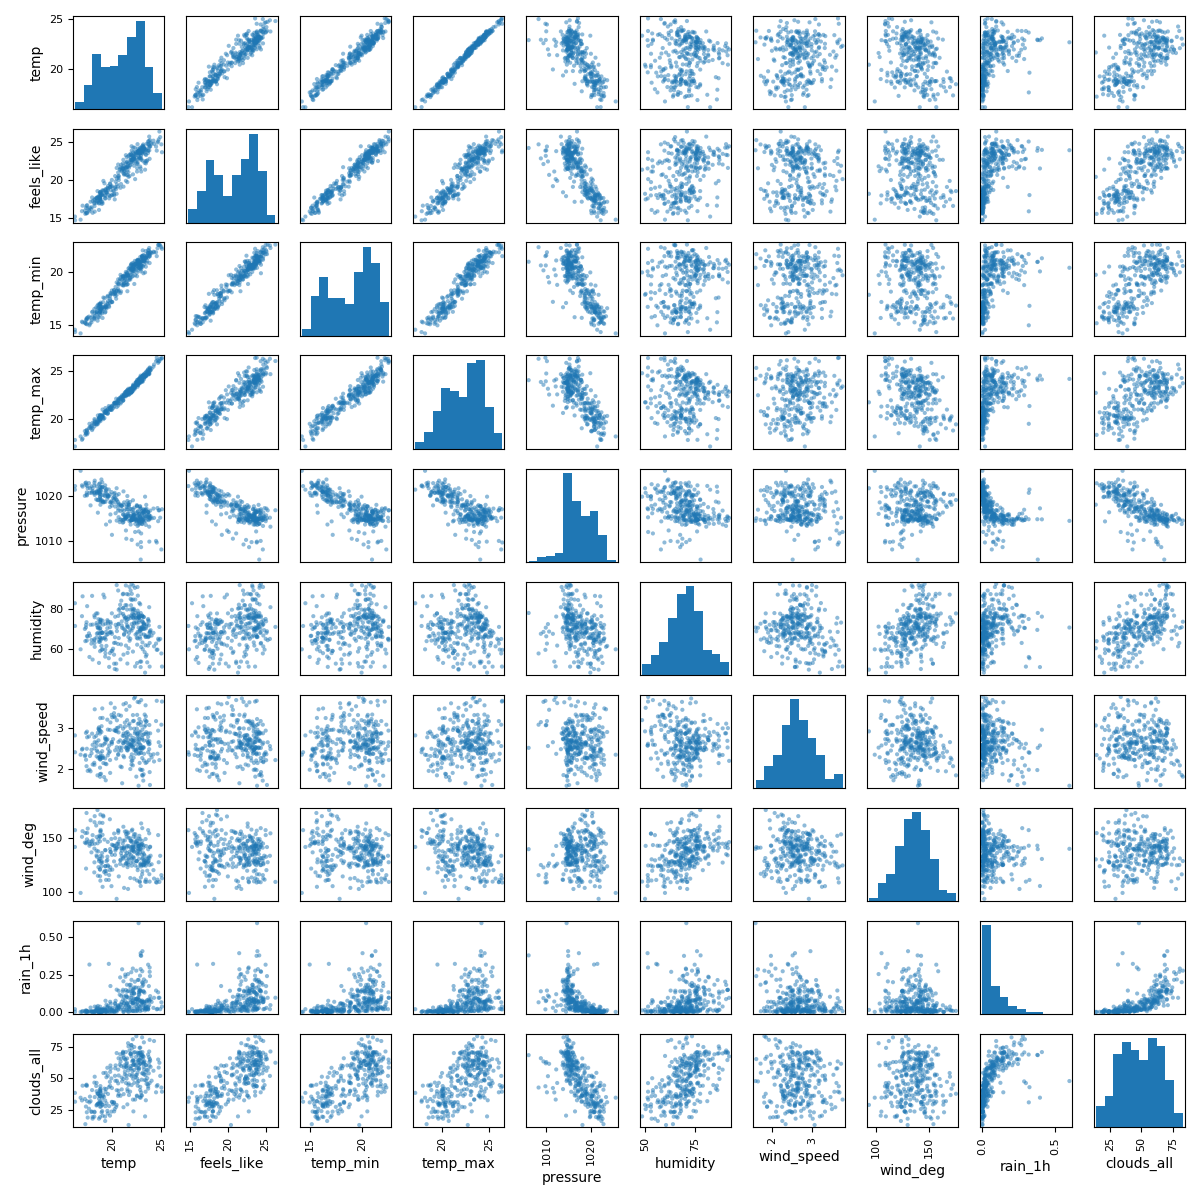

Saving figure Matriz de dispersão


In [82]:
from pandas.plotting import scatter_matrix
scatter_matrix(arquivo[atributos].resample('M').mean(), figsize=(12,12))
save_fig('Matriz de dispersão')

<IPython.core.display.Javascript object>


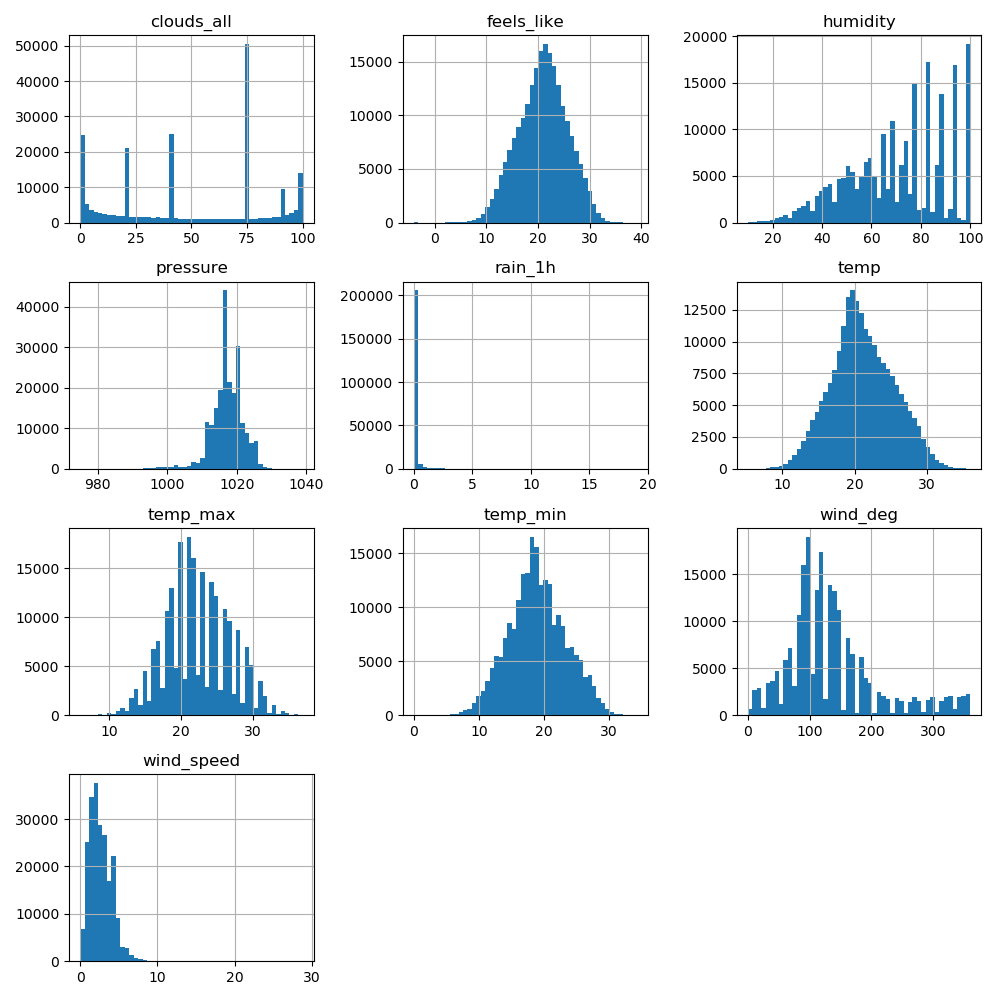

Saving figure histograma de distribuição DB2


In [89]:
histograma = arquivo.hist(bins = 50, figsize=(10,10))
save_fig('histograma de distribuição DB2')

In [ ]:
arquivo['humidity'].resample('M').mean().plot()

In [ ]:
arquivo['clouds_all'].resample('M').mean().plot()

<IPython.core.display.Javascript object>


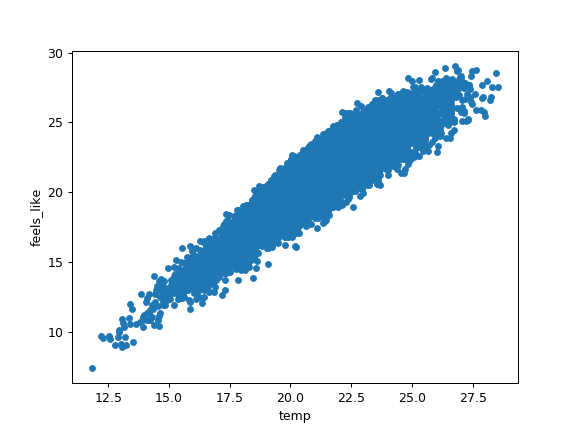

In [251]:
arquivo.resample('D').mean().plot(kind='scatter',x='temp',y='feels_like')

<IPython.core.display.Javascript object>


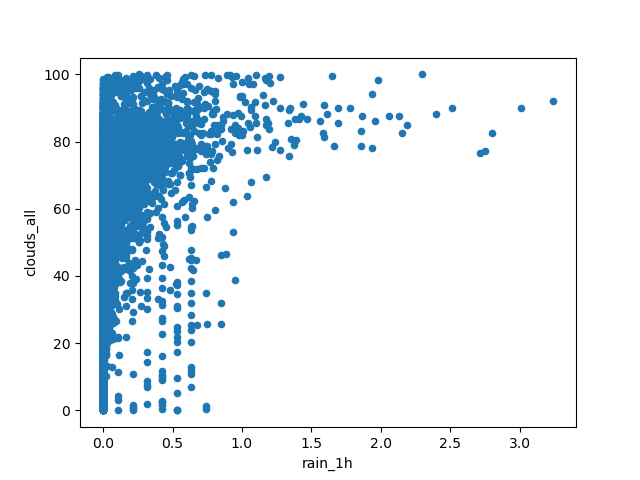

In [19]:
arquivo.resample('D').mean().plot(kind='scatter',y='clouds_all',x='rain_1h')

<IPython.core.display.Javascript object>


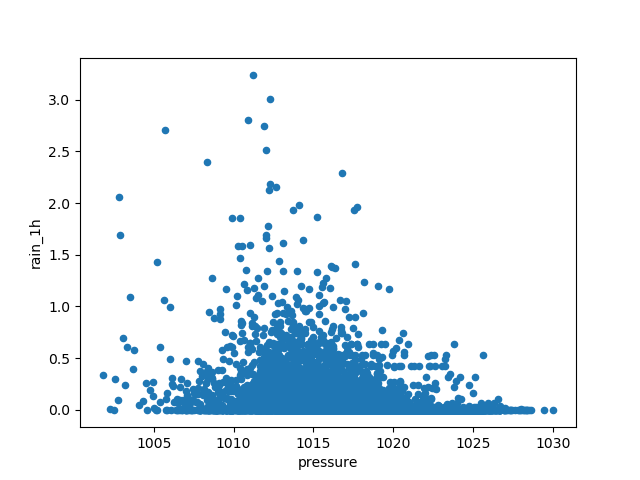

In [83]:
arquivo.resample('D').mean().plot(kind='scatter',x='pressure',y='rain_1h')

## Dados Categóricos

Todos os dados foram codificados por Encoders em uma matriz Esparsa.

In [166]:
dados_discretos = arquivo['weather_main'].value_counts()
dados_discretos

Clouds          155279
Clear            40097
Rain             14881
Thunderstorm      3022
Mist              1982
Drizzle            761
Fog                604
Haze               303
Smoke               28
Dust                 2
Tornado              1
Name: weather_main, dtype: int64

In [167]:
outros = dados_discretos[5:]
outros = outros.sum()
data = dados_discretos[:4]
data['Outros'] = outros
data = [155295,40097,14888,3022,1699]
index = ['Nublado','Claro', 'Chuva', 'Tempestade', 'Outros']
data=pd.Series(data, index=index, name ='Tempo')

Saving figure predominancia do tempo


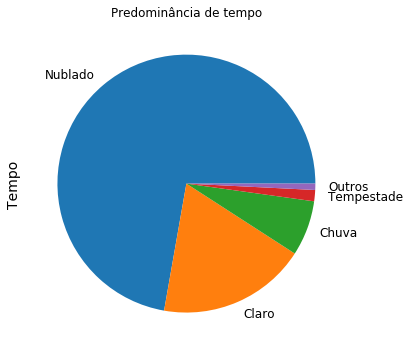

In [173]:
pie_fig = data.plot.pie(subplots=True, figsize=(7,5))
plt.title('Predominância de tempo')
save_fig('predominancia do tempo')

# Explorando a time series

In [29]:
rain_fig = plt.Figure(figsize=(10,6)); ax=rain_fig.add_subplot(1,1,1)
ax.plot(arquivo['rain_1h'].resample('Y').sum(),linewidth=2,color='k')
ax.set_ylabel('Chuva (mm)')
ax.set_xlabel('Tempo (anos)')
rain_fig.suptitle("Volume de chuvas em Belo Horizonte por ano")
rain_fig.savefig('C:/Users/André Tavares/Desktop/rain.png',dpi=400)

In [241]:
arquivo.head(5)

,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all,weather_main
dt_iso,,,,,,,,,,,,
1995-12-31 00:00:00,1995-12-31 00:00:00,21.60,25.09,19.81,22.4,1013,97,1.06,14,0.0,75,Mist
1995-12-31 01:00:00,1995-12-31 01:00:00,21.04,22.93,19.46,22.0,1014,94,2.60,60,0.0,75,Clouds
1995-12-31 02:00:00,1995-12-31 02:00:00,20.98,23.51,19.12,22.0,1014,94,1.65,346,0.0,75,Clouds
1995-12-31 03:00:00,1995-12-31 03:00:00,20.20,22.45,17.67,22.0,1013,94,1.54,353,0.0,75,Clouds
1995-12-31 04:00:00,1995-12-31 04:00:00,19.81,21.93,17.67,21.0,1013,94,1.47,352,0.0,75,Clouds


# Comportamento ruidoso dos dados

Ao fazer o plot da temperatura por tempo temos um over plot, no qual os dados assumem um comportamento visualmente ruidoso, portanto estratégias como média e média móvel por períodos de tempo podem trazer informações importantes. Nesta seção foi investigado qual a melhor janela de operação para média móvel com a finalidade de capturar tendências na variação 

<IPython.core.display.Javascript object>


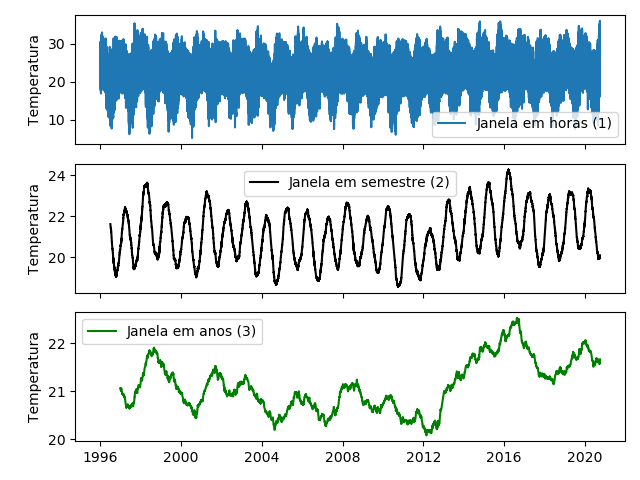

Saving figure Comportamento dos dados em Janelas móveis variadas


In [36]:
ruido = plt.Figure(figsize=(25,40)); 
ruido, rax = plt.subplots(3,1, sharex=True,sharey=False)
rax[0].plot(arquivo['temp'],label='Janela em horas (1)')
rax[1].plot(arquivo['temp'].rolling(12*365).mean(),label='Janela em semestre (2)', color='k')
rax[2].plot(arquivo['temp'].rolling(24*365).mean(),label='Janela em anos (3)', color='g')
for it in range(3):
    rax[it].legend(loc='best')
    rax[it].set_ylabel('Temperatura')
ruido.suptitle('Comportamento dos dados em Janelas móveis variadas')


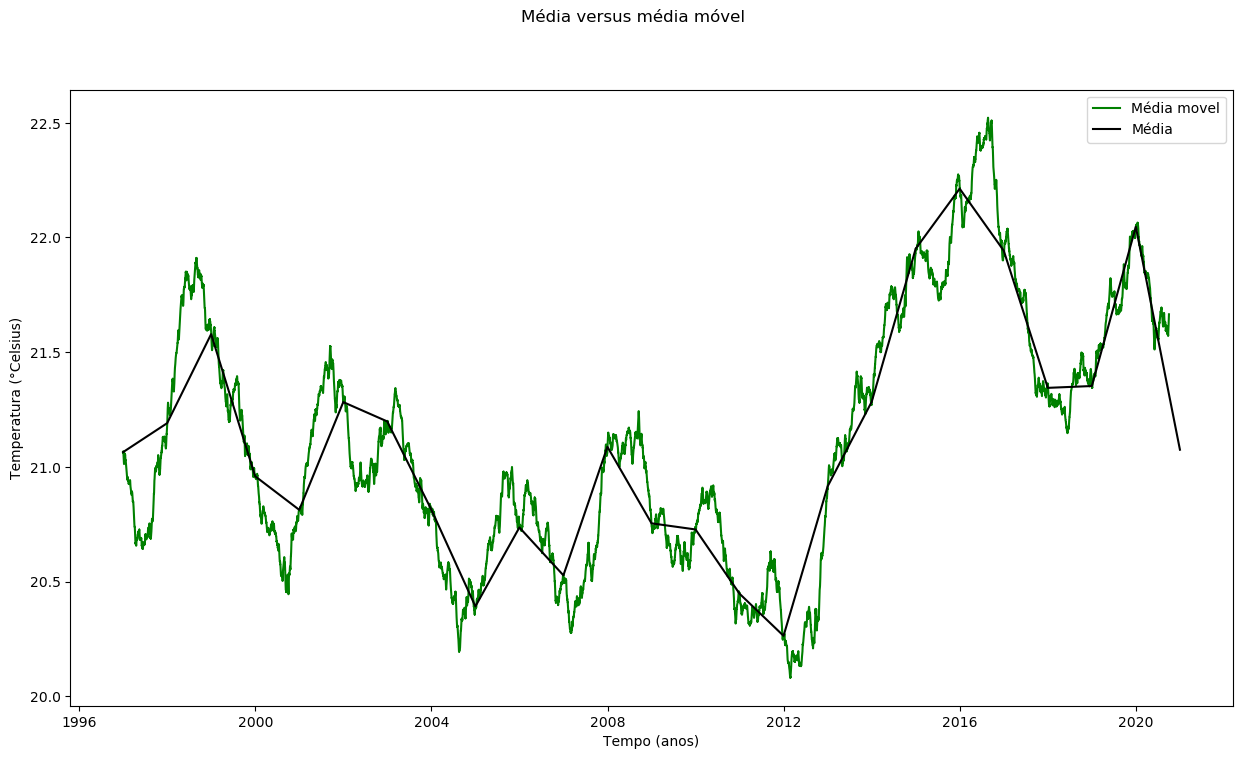

In [86]:
comparison = plt.Figure((15,8)); axe = comparison.add_subplot(1,1,1)
axe.plot(arquivo['temp'].rolling(24*365).mean(),label='Média movel', color='g')
axe.plot(arquivo['temp'].resample('Y').mean(), label='Média', color='k')
axe.set_xlabel('Tempo (anos)')
axe.set_ylabel('Temperatura (°Celsius)')
comparison.suptitle('Média versus média móvel')
axe.legend(loc='best')
comparison

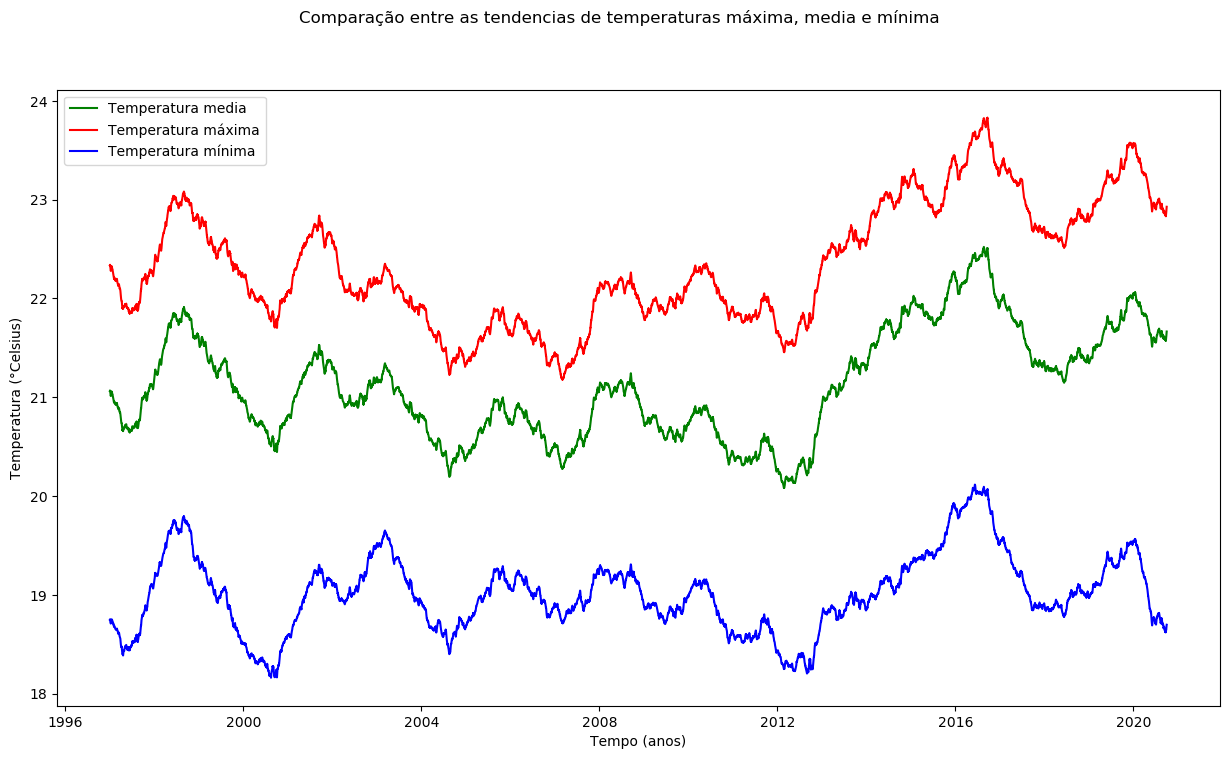

In [85]:
comparison = plt.Figure((15,8)); axe = comparison.add_subplot(1,1,1)
axe.plot(arquivo['temp'].rolling(24*365).mean(),label='Temperatura media', color='g')
axe.plot(arquivo['temp_max'].rolling(24*365).mean(), label='Temperatura máxima', color='r')
axe.plot(arquivo['temp_min'].rolling(24*365).mean(), label='Temperatura mínima', color='b')
axe.set_xlabel('Tempo (anos)')
axe.set_ylabel('Temperatura (°Celsius)')
comparison.suptitle('Comparação entre as tendencias de temperaturas máxima, media e mínima')
axe.legend(loc='best')
comparison

Saving figure Media e desvio padrão da temperatura com a janela de ano 2


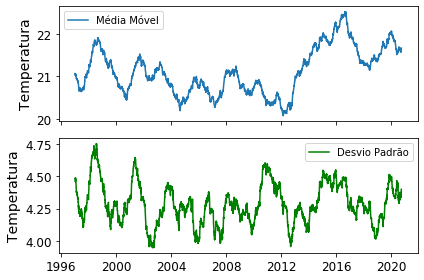

In [182]:
temp_behaviour = plt.Figure((25,40)); temp_behaviour, rax2 = plt.subplots(2,1, sharex=True,sharey=False)
rax2[0].plot(arquivo['temp'].rolling(24*365).mean(),label='Média Móvel')
rax2[1].plot(arquivo['temp'].rolling(24*365).std(), label='Desvio Padrão', color='g')
for it in range(2):
    rax2[it].legend(loc='best')
    rax2[it].set_ylabel('Temperatura')
save_fig('Media e desvio padrão da temperatura com a janela de ano 2')

OVERPLOT - DADOS NÃO DEMONSTRAM EVOLUÇÃO DA SÉRIE TEMPORAL -> Solução reduzir medidas/hora para medidas por dia pela função mean_value_simplifier() declarada  abaixo.


<IPython.core.display.Javascript object>


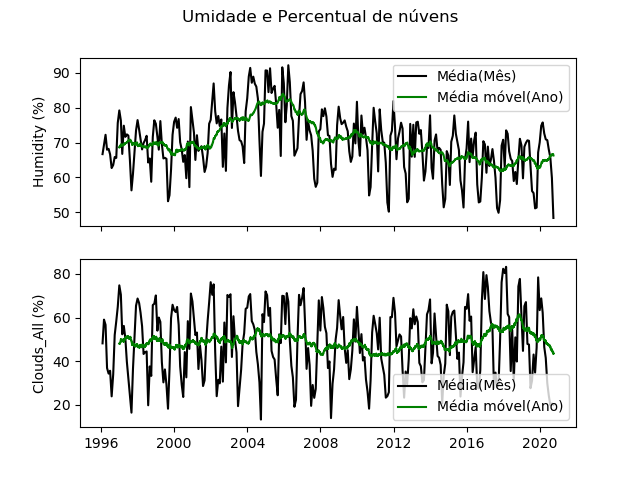

Text(0.5, 0.98, 'Umidade e Percentual de núvens')

In [87]:
umidade = plt.Figure((15,10)); umidade, axes = plt.subplots(2,1, sharex=True, sharey=False)
atributos = ['humidity', 'clouds_all']
eixo=[0,1]
for atributo, axis in zip(atributos, eixo):
    axes[axis].plot(arquivo[atributo].resample('M').mean(), label='Média(Mês)',color='k')
    axes[axis].plot(arquivo[atributo].rolling(24*365).mean(),label='Média móvel(Ano)', color='g')
    axes[axis].set_ylabel('{0} (%)'.format(atributo.title()))
    axes[axis].legend(loc='best')
umidade.suptitle('Umidade e Percentual de núvens')


<IPython.core.display.Javascript object>


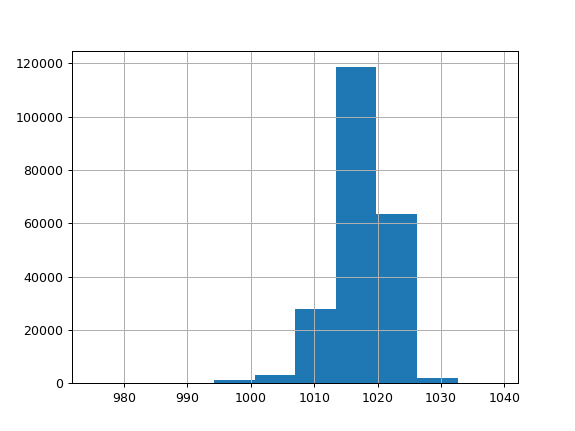

In [243]:
arquivo['pressure'].hist()

# Simplificação de variáveis 

As variáveis de interesse foram reduzidas a médias por dia:

In [15]:
def mean_value_simplifier(var):
    result=[]
    i=0
    soma = 0
    for varis in var:
        i+=1
        if (i%24) == 0:
            soma = soma+varis
            media = soma/24
            result.append(media)
            soma = 0
        else:
            soma = soma+varis
    return result

In [16]:
def get_amplitude(var):
    result=[]
    i=0
    soma = 0
    conjunto =[]
    for varis in var:
        i+=1
        if (i%24) == 0:
            conjunto.append(varis)
            amplitude = max(conjunto)-min(conjunto)
            result.append(amplitude)
            conjunto = []
            
        else:
            conjunto.append(varis)
    return result

In [17]:
temp_amp = get_amplitude(arquivo['temp'])

In [18]:
temperatura = mean_value_simplifier(arquivo['temp'])
temp_min = mean_value_simplifier(arquivo['temp_min'])
temp_max = mean_value_simplifier(arquivo['temp_max'])

In [19]:
sdic = {'Temperatura mínima':temp_min,'Temperatura máxima':temp_max,'Temperatura média':temperatura, 'Amplitude':temp_amp}
index = pd.date_range('1996','2020-09-30') # Para grantir o numero de (index = lines)entradas extrapolou-se em 4 meses o tempo.
#len(data) > len(index['1995-12-31','2020-09-30'])
SimplifiedDF = pd.DataFrame(sdic, index=index)

O número de simplificações não corresponde ao número de dias. Verificar por meio do time delta de dias entre as datas de inicio e final; e o mesmo delta em horas; condição de satisfação fazer --> delta dias * 24 e verificar se numero total de datapoints do new_df corresponde a essa conta. Possíveis erros: MMC, instruções mal interpretadas ou função mal estruturada.

In [192]:
SimplifiedDF['Temperatura média'].max()

28.542916666666667

In [193]:
SimplifiedDF['Temperatura mínima'].min()

8.803333333333335

In [194]:
SimplifiedDF['Temperatura máxima'].max()

29.929999999999996

In [195]:
SimplifiedDF

,Temperatura mínima,Temperatura máxima,Temperatura média,Amplitude
1996-01-01,19.693750,21.199583,20.585417,4.46
1996-01-02,20.395833,22.640000,21.799583,8.41
1996-01-03,20.508750,23.166250,22.082917,7.09
1996-01-04,21.915417,24.620000,23.624583,12.01
1996-01-05,22.552083,26.282917,24.961250,10.37
...,...,...,...,...
2020-09-26,20.147917,24.898750,23.465000,14.02
2020-09-27,21.685833,26.522917,25.252917,15.75
2020-09-28,24.162083,28.862917,27.072500,17.39
2020-09-29,24.458750,29.930000,27.827083,15.36


In [50]:
SimplifiedDF['Temperatura média'].resample('y').mean().plot(label='média',legend='média')

## Variação da amplitude com o tempo

Saving figure Amplitude Termica ao longe do tempo


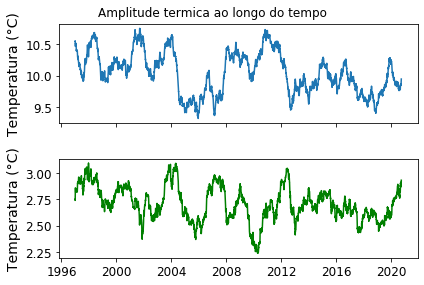

In [196]:
figura = plt.Figure(figsize=(15,10)); figura, ax = plt.subplots(2,1, sharex=True, sharey=False)
ax[0].plot(SimplifiedDF['Amplitude'].rolling(365).mean(), label='média movel')
ax[0].set_ylabel('Temperatura (°C)')
ax[1].plot(SimplifiedDF['Amplitude'].rolling(365).std(),label='média movel',color='g')
ax[1].set_ylabel('Temperatura (°C)')
figura.suptitle('Amplitude termica ao longo do tempo')
save_fig('Amplitude Termica ao longe do tempo')

<IPython.core.display.Javascript object>


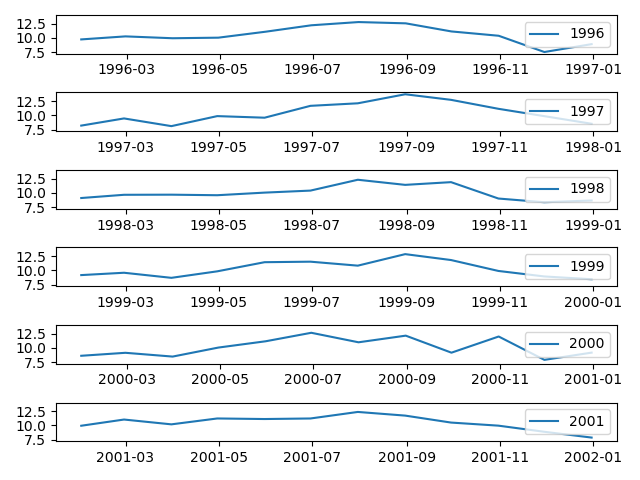

Saving figure Amplitude 1996-2001


In [21]:
%matplotlib notebook
fig4 = plt.Figure(figsize=(10,50)); fig4, axes = plt.subplots(6,1, sharex=False,sharey=True)
anos=['1996','1997','1998','1999','2000','2001']
for it,ano in zip(range(len(anos)),anos):
    axes[it].plot(SimplifiedDF[ano]['Amplitude'].resample('M').mean(),label=ano)
    axes[it].legend(loc='right')
save_fig('Amplitude 1996-2001')

<IPython.core.display.Javascript object>


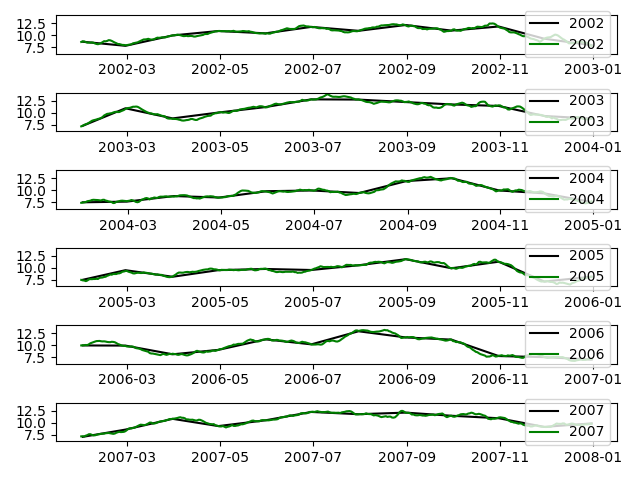

Saving figure Amplitude 2002-2007


In [22]:
fig4 = plt.Figure(figsize=(10,50)); fig4, axes = plt.subplots(6,1, sharex=False,sharey=True)
anos=['2002','2003','2004','2005','2006','2007']
for it,ano in zip(range(len(anos)),anos):
    axes[it].plot(SimplifiedDF[ano]['Amplitude'].resample('M').mean(),label=ano,color='k')
    axes[it].plot(SimplifiedDF[ano]['Amplitude'].rolling(30).mean(),label=ano, color ='g')
    axes[it].legend(loc='right')
save_fig('Amplitude 2002-2007')

<IPython.core.display.Javascript object>


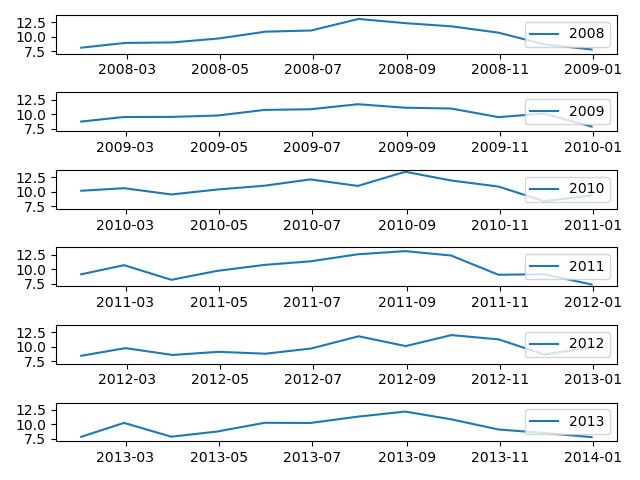

Saving figure Amplitude 2008-2013


In [23]:
fig4 = plt.Figure(figsize=(10,50)); fig4, axes = plt.subplots(6,1, sharex=False,sharey=True)
anos=['2008','2009','2010','2011','2012','2013']
for it,ano in zip(range(len(anos)),anos):
    axes[it].plot(SimplifiedDF[ano]['Amplitude'].resample('M').mean(),label=ano)
    axes[it].legend(loc='right')
save_fig('Amplitude 2008-2013')

<IPython.core.display.Javascript object>


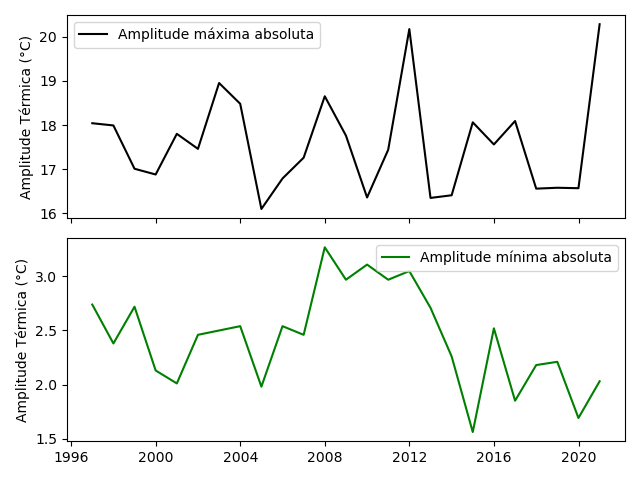

Saving figure Amplitude máximas e mínimas absolutas entre 1996 e 2020


In [26]:
fig5 = plt.Figure(figsize=(10,7)); fig5, axes = plt.subplots(2,1,sharex=True, sharey=False)
axes[0].plot(SimplifiedDF['Amplitude'].resample('Y').max(),label='Amplitude máxima absoluta',color='k')
axes[1].plot(SimplifiedDF['Amplitude'].resample('Y').min(), label='Amplitude mínima absoluta', color='g')
for it in range(2):
    axes[it].legend(loc='best')
    axes[it].set_ylabel('Amplitude Térmica (°C)')
save_fig('Amplitude máximas e mínimas absolutas entre 1996 e 2020')

# Quadro Geral do clima da serie temporal

In [144]:
outroM=pd.DataFrame()

In [145]:
outroM['min'] = arquivo['temp'].resample('M').min()
outroM['max'] = arquivo['temp'].resample('M').max()
outroM['med'] = arquivo['temp'].resample('M').mean()
outroM['Umidade'] = arquivo['humidity'].resample('M').min()
outroM['Chuvas (mm)'] = arquivo['rain_1h'].resample('M').sum()

In [146]:
astrunc = list(arquivo['temp'].resample('M').mean())
nw =[]
for num in astrunc:
    nw.append(float("%.2f" % num))
#truncar o numero de casas decimais
outroM['med']=np.array(nw)

In [147]:
classific = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'] * 24 + ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set']
outroM['Mês'] = classific
outroM['Data'] = outroM.index
ts = outroM.index
outroM['Ano'] = ts.strftime('%Y')

In [148]:
outroM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 297 entries, 1996-01-31 to 2020-09-30
Freq: M
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   min          297 non-null    float64       
 1   max          297 non-null    float64       
 2   med          297 non-null    float64       
 3   Umidade      297 non-null    int64         
 4   Chuvas (mm)  297 non-null    float64       
 5   Mês          297 non-null    object        
 6   Data         297 non-null    datetime64[ns]
 7   Ano          297 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 20.9+ KB


In [149]:
outroM.head(5)

,min,max,med,Umidade,Chuvas (mm),Mês,Data,Ano
dt_iso,,,,,,,,
1996-01-31,16.90,32.54,24.01,26,49.93,Jan,1996-01-31,1996
1996-02-29,17.98,33.00,23.91,31,58.38,Fev,1996-02-29,1996
1996-03-31,17.51,31.18,23.51,35,50.54,Mar,1996-03-31,1996
1996-04-30,12.93,31.42,21.71,28,21.77,Abr,1996-04-30,1996
1996-05-31,10.80,27.69,18.99,28,12.80,Mai,1996-05-31,1996


In [150]:
reshapedmax = outroM.pivot('Ano','Mês', 'max')
reshapedmax

Mês,Abr,Ago,Dez,Fev,Jan,Jul,Jun,Mai,Mar,Nov,Out,Set
Ano,,,,,,,,,,,,
1996,31.42,31.46,30.83,33.00,32.54,27.85,29.20,27.69,31.18,29.38,31.84,31.92
1997,29.86,30.23,32.04,31.27,30.83,26.88,27.46,27.47,29.80,33.62,33.15,35.40
1998,31.89,30.91,31.23,33.96,32.88,28.32,27.86,29.73,32.54,30.54,32.05,32.45
1999,30.39,31.16,30.12,32.79,32.87,28.24,27.62,28.10,30.58,31.78,32.70,32.19
2000,28.52,31.74,29.95,30.24,32.00,26.33,27.46,28.17,30.41,30.59,33.36,30.42
2001,30.96,28.75,30.37,33.28,31.13,30.11,26.58,30.46,31.31,30.60,31.20,33.47
2002,30.24,30.96,32.77,29.05,30.75,27.50,27.67,30.01,30.72,32.09,33.64,30.65
2003,29.17,28.62,32.20,31.38,31.34,27.32,27.89,29.44,31.35,31.33,34.65,33.26
2004,28.01,29.93,31.18,30.15,29.24,24.89,24.59,26.76,29.95,32.77,31.58,32.73


In [151]:
rmax = reshapedmax.max()

In [152]:
reshapedmin = outroM.pivot('Ano','Mês', 'min')
reshapedmin

Mês,Abr,Ago,Dez,Fev,Jan,Jul,Jun,Mai,Mar,Nov,Out,Set
Ano,,,,,,,,,,,,
1996,12.93,10.31,15.59,17.98,16.90,7.70,8.47,10.80,17.51,16.18,15.03,12.57
1997,13.13,7.89,17.02,16.88,17.03,9.23,6.21,11.47,15.68,16.23,13.28,13.47
1998,13.35,11.53,17.00,18.02,17.68,8.25,6.32,7.93,17.16,14.85,15.49,13.27
1999,13.38,8.70,16.90,17.19,17.73,11.45,9.22,6.86,14.33,13.08,11.74,9.46
2000,12.20,8.25,17.42,16.14,16.63,5.20,8.77,10.34,17.03,15.86,14.99,12.72
2001,15.13,10.51,14.84,17.93,16.94,10.07,10.43,8.34,17.56,16.66,14.04,9.37
2002,15.59,12.49,17.26,16.61,17.43,11.55,10.24,10.46,15.68,13.13,15.69,7.98
2003,14.81,10.60,16.18,17.18,17.05,9.14,10.41,8.65,16.09,13.22,11.04,11.54
2004,11.60,8.55,16.79,15.68,16.37,7.08,7.97,10.54,15.31,16.30,13.87,13.10


In [153]:
rmin = reshapedmin.min()

In [154]:
reshapedmed = outroM.pivot('Ano','Mês', 'med')
reshapedmed

Mês,Abr,Ago,Dez,Fev,Jan,Jul,Jun,Mai,Mar,Nov,Out,Set
Ano,,,,,,,,,,,,
1996,21.71,18.67,22.25,23.91,24.01,17.91,17.75,18.99,23.51,21.34,22.51,20.29
1997,20.98,19.30,23.06,23.39,22.90,18.21,17.82,18.77,21.64,23.11,22.38,22.95
1998,22.85,20.68,22.73,24.80,23.73,18.20,17.36,19.80,24.20,21.19,21.52,22.12
1999,21.83,18.67,22.04,23.79,23.72,19.01,18.77,18.81,22.68,20.66,20.90,20.85
2000,21.17,19.30,23.06,22.79,22.69,17.45,17.92,19.02,22.24,21.11,23.50,19.52
2001,22.51,18.92,21.95,24.88,23.21,18.42,18.83,19.78,23.24,22.42,21.21,20.34
2002,22.16,20.20,22.61,21.66,22.85,18.20,18.62,19.98,22.60,22.21,23.40,19.87
2003,21.48,18.80,22.76,23.66,22.31,17.35,18.78,18.39,22.13,22.11,21.77,20.49
2004,20.62,18.61,21.76,21.40,21.88,16.23,17.01,19.12,21.49,22.76,22.23,21.67


In [155]:
rmed = reshapedmed.max()

In [156]:
rmed

Mês
Abr    22.85
Ago    20.68
Dez    23.86
Fev    24.88
Jan    25.00
Jul    19.43
Jun    19.59
Mai    21.02
Mar    24.20
Nov    24.67
Out    25.06
Set    23.42
dtype: float64

In [158]:
reshapedhumidmin = outroM.pivot('Ano','Mês', 'Umidade')

In [159]:
rhumin = reshapedhumidmin.max()

In [160]:
reshapedhumidmin

Mês,Abr,Ago,Dez,Fev,Jan,Jul,Jun,Mai,Mar,Nov,Out,Set
Ano,,,,,,,,,,,,
1996,28.0,22.0,37.0,31.0,26.0,11.0,16.0,28.0,35.0,26.0,26.0,21.0
1997,25.0,16.0,33.0,33.0,39.0,25.0,26.0,35.0,35.0,19.0,18.0,14.0
1998,33.0,19.0,34.0,28.0,30.0,19.0,28.0,32.0,27.0,33.0,24.0,21.0
1999,32.0,10.0,34.0,31.0,22.0,25.0,20.0,14.0,38.0,23.0,12.0,15.0
2000,31.0,10.0,35.0,30.0,31.0,20.0,13.0,27.0,33.0,27.0,12.0,25.0
2001,29.0,23.0,20.0,29.0,34.0,25.0,31.0,18.0,33.0,29.0,19.0,18.0
2002,33.0,22.0,29.0,31.0,40.0,31.0,36.0,36.0,35.0,26.0,14.0,22.0
2003,35.0,19.0,33.0,33.0,42.0,29.0,29.0,17.0,31.0,31.0,11.0,13.0
2004,44.0,28.0,40.0,48.0,48.0,36.0,40.0,33.0,45.0,31.0,29.0,13.0


In [124]:
reshapedrain = outroM.pivot('Ano','Mês', 'Chuvas (mm)')
reshapedrain

Mês,Abr,Ago,Dez,Fev,Jan,Jul,Jun,Mai,Mar,Nov,Out,Set
Ano,,,,,,,,,,,,
1996,21.77,4.89,122.27,58.38,49.93,2.12,3.71,12.80,50.54,180.12,25.43,41.92
1997,47.61,0.54,202.80,26.40,213.41,1.00,20.95,14.67,105.27,139.70,37.27,32.09
1998,14.91,20.88,97.64,63.84,128.90,0.45,8.00,19.30,20.35,74.32,74.42,4.77
1999,5.46,0.00,104.72,47.75,62.82,2.17,3.61,3.28,120.68,102.13,35.71,12.51
2000,1.55,12.76,128.23,54.10,160.12,2.53,0.30,0.12,66.32,106.78,17.37,24.19
2001,4.22,8.57,198.05,12.33,51.66,7.00,0.00,11.28,41.52,117.83,43.94,26.88
2002,4.09,4.81,159.08,64.25,109.94,4.87,0.00,10.55,16.91,88.44,20.50,40.03
2003,9.24,10.62,86.10,11.96,150.76,0.51,0.00,10.78,47.48,39.07,15.00,19.91
2004,26.14,0.00,134.70,102.37,101.77,13.64,4.29,11.11,41.86,103.27,19.64,0.12


In [125]:
rrain = reshapedrain.max()

In [126]:
rrainmin = reshapedrain.min()

In [161]:
stddf = pd.DataFrame({'Temperatura máxima':rmax,'Temperatura Mínima':rmin,'Temperatura média':rmed,
                      'Chuva max (mm)':rrain, 'Chuva min (mm)':rrainmin, 'Umidade minima':rhumin})
stddf
#Acresenctar umidade relativa, chuvas por agregação, 

,Temperatura máxima,Temperatura Mínima,Temperatura média,Chuva max (mm),Chuva min (mm),Umidade minima
Mês,,,,,,
Abr,31.89,11.34,22.85,428.60,1.55,45.0
Ago,31.99,6.05,20.68,239.63,0.00,28.0
Dez,33.10,14.52,23.86,281.93,16.38,40.0
Fev,33.96,12.73,24.88,185.91,6.30,48.0
Jan,34.31,16.00,25.00,302.89,15.17,48.0
Jul,30.55,5.20,19.43,236.22,0.00,36.0
Jun,29.94,6.21,19.59,29.14,0.00,41.0
Mai,30.46,6.86,21.02,212.69,0.12,39.0
Mar,32.54,14.33,24.20,135.89,8.73,51.0


In [162]:
dftrans1 = np.transpose(stddf)
dftrans = dftrans1[['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']]
dftrans

Mês,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
Temperatura máxima,34.31,33.96,32.54,31.89,30.46,29.94,30.55,31.99,36.05,35.93,34.68,33.10
Temperatura Mínima,16.00,12.73,14.33,11.34,6.86,6.21,5.20,6.05,7.98,11.04,11.24,14.52
Temperatura média,25.00,24.88,24.20,22.85,21.02,19.59,19.43,20.68,23.42,25.06,24.67,23.86
Chuva max (mm),302.89,185.91,135.89,428.60,212.69,29.14,236.22,239.63,283.58,221.52,209.43,281.93
Chuva min (mm),15.17,6.30,8.73,1.55,0.12,0.00,0.00,0.00,0.00,4.71,30.25,16.38
Umidade minima,48.00,48.00,51.00,45.00,39.00,41.00,36.00,28.00,26.00,37.00,45.00,40.00


# Modelos de Machine Learning

## Dados

In [89]:
y=list(arquivo['temp'].rolling(24*365).mean())
y=pd.Series(y)
y.dropna(inplace=True)
x=np.array(list(y.index)).reshape(-1,1)

8759      21.061707
8760      21.061654
8761      21.061567
8762      21.061611
8763      21.061638
            ...    
216955    21.663106
216956    21.663527
216957    21.664051
216958    21.664606
216959    21.665078
Length: 208201, dtype: float64

## Sktime (Não está no texto principal)

In [38]:
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.utils.plotting.forecasting import plot_ys

181921 26280


c:\users\andré tavares\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


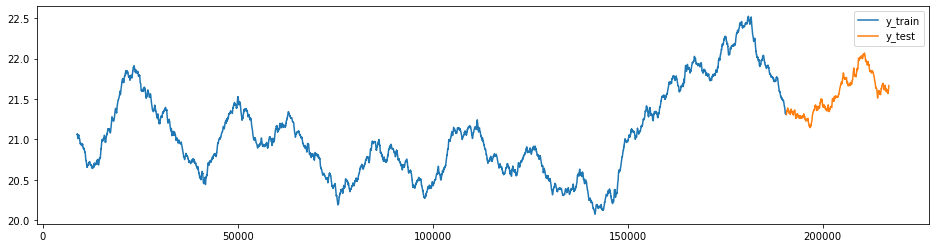

In [40]:
y_train, y_test = temporal_train_test_split(y, test_size=3*24*365)
plot_ys(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

c:\users\andré tavares\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


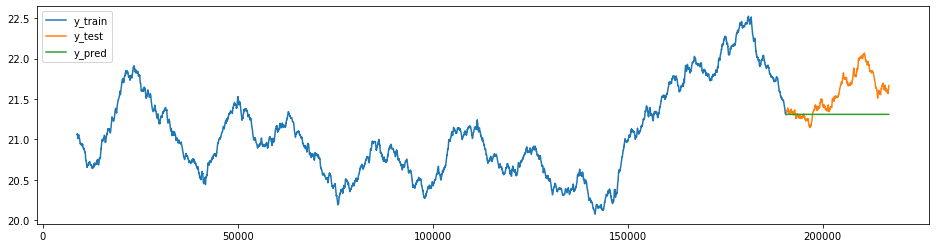

In [41]:
fh = np.arange(1, len(y_test) + 1)
y_pred = np.repeat(y_train.iloc[-1], len(fh))
y_pred = pd.Series(y_pred, index=y_train.index[-1] + fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

### Naive Bayes

0.012423016483280562

c:\users\andré tavares\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


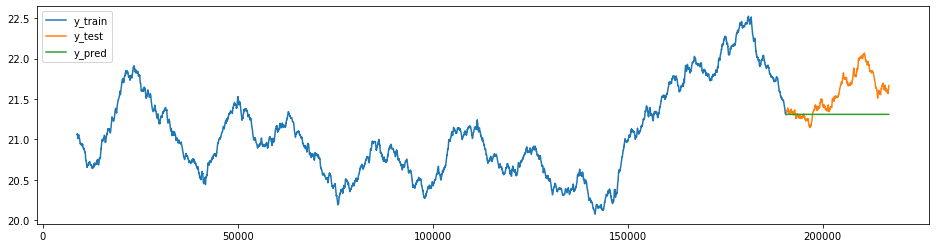

In [42]:
# using sktime 
from sktime.forecasting.naive import NaiveForecaster

forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_pred, y_test)

0.020986115217310863

c:\users\andré tavares\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


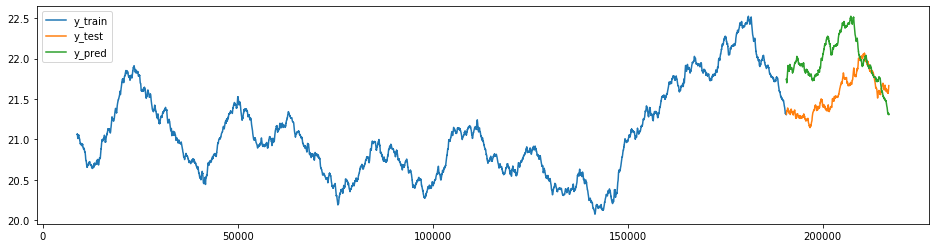

In [43]:
forecaster = NaiveForecaster(strategy="last", sp=3*365*24)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_pred, y_test)

# Sklearn

## Árvores de decisão

In [85]:
from sklearn.tree import DecisionTreeRegressor
rfmodel = DecisionTreeRegressor(max_depth=8)
rfmodel.fit(x,y)

DecisionTreeRegressor(max_depth=8)

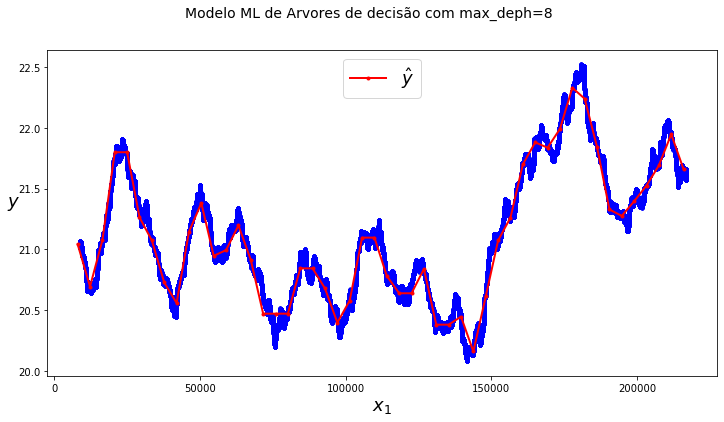

In [86]:
ml_fig1 = plt.Figure(figsize=(12,6)); ax=ml_fig1.add_subplot(1,1,1)
x1 = np.linspace(8000, 216000).reshape(-1, 1)
y_pred1 = rfmodel.predict(x1)
ax.plot(x, y, "b.")
ax.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18, rotation=0)
ax.legend(loc="upper center", fontsize=18)
ml_fig1.suptitle("Modelo ML de Arvores de decisão com max_deph=8 ", fontsize=14)
ml_fig1

## Encontrando o melhor modelo com GridSearch

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'max_depth' : [4,5,6,7,8,10],
    'max_leaf_nodes':[2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[2,4,6,8,10]
}
grid_search = GridSearchCV(tree_model,param_grid,cv=5, 
                           scoring='neg_mean_squared_error')


In [35]:
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=4),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 4, 6, 8, 10]},
             scoring='neg_mean_squared_error')

In [36]:
grid_search.best_params_

{'max_depth': 4, 'max_leaf_nodes': 3, 'min_samples_leaf': 2}

In [82]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=4,max_leaf_nodes= 3,min_samples_leaf= 2)
tree_model.fit(x, y)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=3, min_samples_leaf=2)

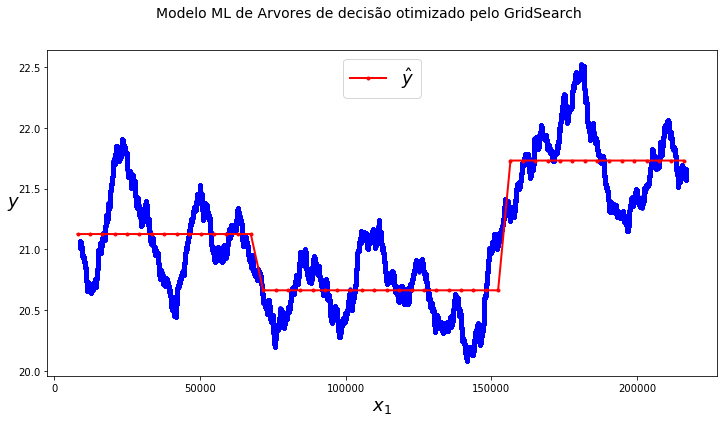

In [87]:
ml_fig2 = plt.Figure(figsize=(12,6)); ax=ml_fig2.add_subplot(1,1,1)
x1 = np.linspace(8000, 216000).reshape(-1, 1)
y_pred1 = tree_model.predict(x1)
ax.plot(x, y, "b.")
ax.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18, rotation=0)
ax.legend(loc="upper center", fontsize=18)
ml_fig2.suptitle("Modelo ML de Arvores de decisão otimizado pelo GridSearch ", fontsize=14)
ml_fig2

## Regressão Polinomial

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(21.515275059136677, array([-1.63176730e-05,  8.82298193e-11]))

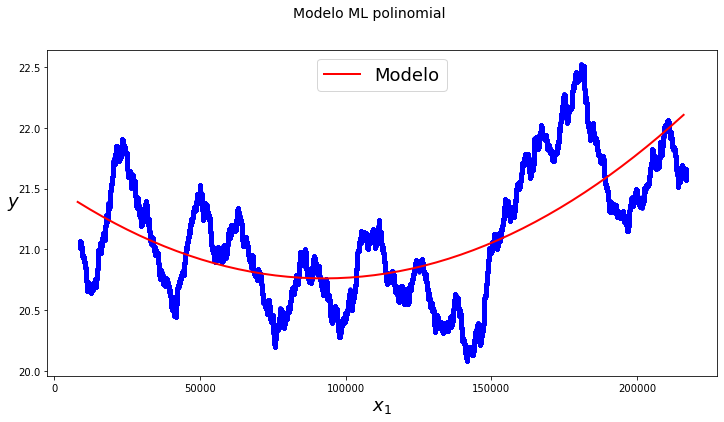

In [88]:
ml_fig3 = plt.Figure(figsize=(12,6)); ax=ml_fig3.add_subplot(1,1,1)
X_new = np.linspace(8000, 216000).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
ax.plot(x, y, "b.")
ax.plot(X_new, y_new, "r-", linewidth=2, label="Modelo")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18, rotation=0)
ax.legend(loc="upper center", fontsize=18)
ml_fig3.suptitle("Modelo ML polinomial ", fontsize=14)
ml_fig3

### Cross Validation

In [42]:
def mostrar_resultados(scores):
    print("Scores:", scores)
    print("Media:", scores.mean())
    print("Desvio Padrão:", scores.std())

#### Arivore de decisão com hiper parâmetro max_deph=8!

In [74]:
#Para Arvore de decisão com max_deph=8
from sklearn.model_selection import cross_val_score
scores= cross_val_score(rfmodel, x , y, scoring ='neg_mean_squared_error', cv=10)
rmse_train_scores = np.sqrt(-scores)

In [75]:
mostrar_resultados(rmse_train_scores)

Scores: [0.41045866 0.45641697 0.42284507 0.20642527 0.29801812 0.32771386
 0.48793594 0.2816602  0.25595333 0.445407  ]
Media: 0.35928344215620966
Desvio Padrão: 0.09213078630325501


####  Árvore de decisão com hiper parâmetros: max_depth= 4, max_leaf_nodes= 3, min_samples_leaf= 2

In [76]:
#Para Arvore de decisão
from sklearn.model_selection import cross_val_score
scores= cross_val_score(tree_model, x , y, scoring ='neg_mean_squared_error', cv=10)
rmse_test_scores = np.sqrt(-scores)

In [77]:
mostrar_resultados(rmse_test_scores)

Scores: [0.47603064 0.36914746 0.40017279 0.20647522 0.32895336 0.166403
 0.39292489 0.24876639 0.45384867 0.30259016]
Media: 0.33453125744317297
Desvio Padrão: 0.09810608873174673


#### Modelo Polinomial 2º Grau 

In [78]:
#Polinomial
from sklearn.model_selection import cross_val_score
scores= cross_val_score(lin_reg, x , y, scoring ='neg_mean_squared_error', cv=10)
rmse_test_scores = np.sqrt(-scores)

In [79]:
mostrar_resultados(rmse_test_scores)

Scores: [0.85831883 0.33433904 0.24796946 0.45822401 0.44251603 0.5736796
 0.8356423  0.56538777 0.74956615 0.34142573]
Media: 0.5407068933644924
Desvio Padrão: 0.20435839011486057


# Para salvar árvores de decisões

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model,
               out_file=r'diretorio\arquivo.dot', #Colocar direório com o nome do arquivo com .dot no final
               rounded=True,
               filled=True) #depois de salvo converter para png em qualquer conversor da web

# Regressão (Não está no texto principal)

In [57]:
from sklearn.model_selection import train_test_split
x=np.array(arquivo['clouds_all'].resample('D').mean()).reshape(-1,1)
y=np.array(arquivo['rain_1h'].resample('D').mean())
x_train, x_test, y_train, y_test = train_test_split(x,y)


In [73]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=4)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [87]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=4)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=3)

In [83]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model,
               out_file=r'C:\Users\André Tavares\Desktop\tree2.dot',
               rounded=True,
               filled=True)

Text(0.5, 1.0, 'No restrictions')

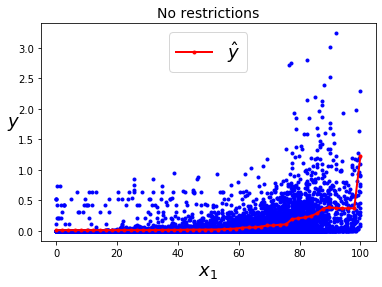

In [88]:
x1 = np.linspace(0, 100).reshape(-1, 1)
y_pred1 = model.predict(x1)
plt.plot(x, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

## Temp x Feels like

### Regressão Linear

In [106]:
from sklearn.linear_model import LinearRegression
X=np.array(arquivo['temp']).reshape(-1,1)
y=np.array(arquivo['feels_like']).reshape(-1,1)
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([-0.76971581]), array([[1.02743838]]))

### Gradiente Descendente estocástico

In [107]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42, tol=-inf)

In [71]:
sgd_reg.intercept_, sgd_reg.coef_

(array([0.99219316]), array([1.03625553]))

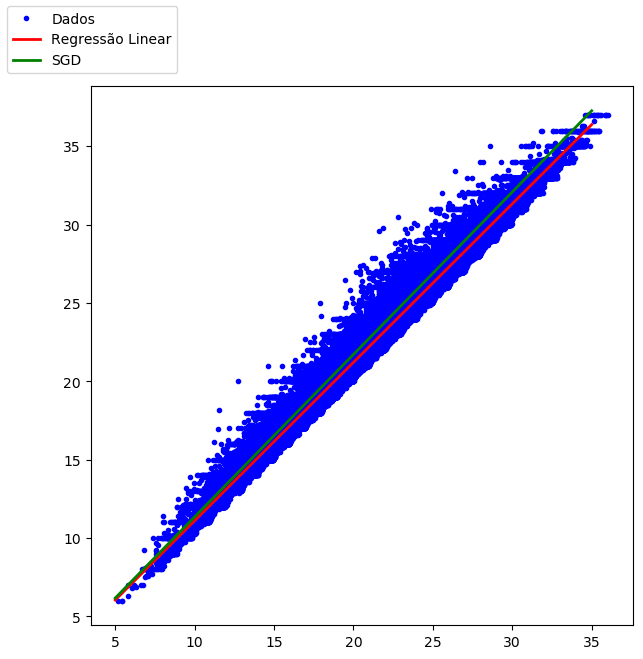

In [88]:
#Polot
x=np.array([[5],[35]])
Y =0.99375124 + 1.01111686*x
figurax = plt.Figure(figsize=(7,7));ax=figurax.add_subplot(1,1,1)
ax.plot(arquivo['temp'],arquivo['temp_max'],'b.',label='Dados')
ax.plot(x, Y, "r-", linewidth=2, label="Regressão Linear")
#====================================================
Y = 0.99219316 + 1.03625553 * x
ax.plot(x,Y,'g-',linewidth=2,label='SGD')
figurax.legend(loc='upper left')
figurax

In [34]:
figurax.savefig('C:/Users/André Tavares/Desktop/ESPECIALIZAÇÃO - PUCMG/Modelos de Regressão linear para temperatura e feels_like.png', dpi=400)


SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42, tol=-inf)

In [101]:
X=np.array(arquivo['temp']).reshape(-1,1)
y=np.array(arquivo['feels_like']).reshape(-1,1)

In [102]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [103]:
X[0]

array([21.25])

In [104]:
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

NameError: name 'lin_reg' is not defined

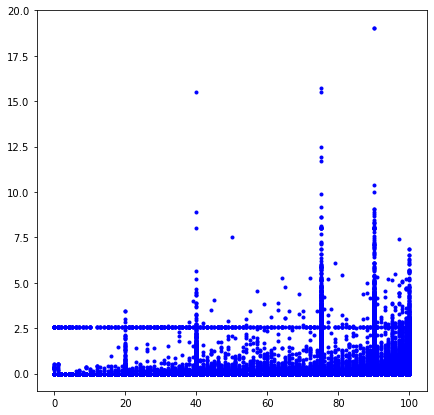

In [105]:
figuray = plt.Figure(figsize=(7,7));ax=figuray.add_subplot(1,1,1)
ax.plot(arquivo['clouds_all'],arquivo['rain_1h'],'b.',label='Dados')

figuray

In [23]:
df = SimplifiedDF.copy()

In [133]:
ts = df.index
df['mes'] = ts.strftime('%m-%d')
df['yr'] = ts.strftime('%Y')

# Salvar arquivo para análise 3

In [82]:
join_1 = arquivo['2018':'2020-09-23']

In [83]:
join_1.to_csv('C:/Users/André Tavares/Desktop/TCC/Open Weather/Weather18-20.csv')